In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# 데이터 준비

In [2]:
# csv 파일 불러오기 
# 뭔가 상태가 이상함 컬럼명이 없음 
df = pd.read_csv("./data/auto-mpg.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# csv 파일 불러오기 
df.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "name"]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [9]:
df.shape

(398, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df["horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [12]:
# 물음표를 결측치로 바꾸기 
df["horsepower"] = df["horsepower"].replace("?", np.nan)

In [14]:
df["horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [18]:
df = df.dropna(subset = ["horsepower"], axis = 0)

In [19]:
df["horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [20]:
df["horsepower"] = df["horsepower"].astype("float64")

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [22]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [24]:
df.shape

(392, 9)

In [25]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [26]:
df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [31]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


In [32]:
ndf.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


In [33]:
x = ndf.drop("mpg", axis = 1)
y = ndf[["mpg"]]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 8)

In [36]:
print(len(x_train), len(x_test))

294 98


## 선형회귀 모델링

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(x_train, y_train)

LinearRegression()

## 모델 해석 및 평가

In [39]:
r_square = lr.score(x_test, y_test)
r_square

0.6637905334920755

In [40]:
# 회귀식의 기울기
# cylinders, horsepower, weight 각각의 기울기 
lr.coef_

array([[-0.55969279, -0.03151424, -0.00554943]])

In [41]:
# 회귀식의 y 절편 
lr.intercept_

array([46.272067])

In [42]:
y_pred = lr.predict(x_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)

In [44]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

4.6114032694524845

In [46]:
pd.DataFrame({"ans" : y_test["mpg"], "pred": y_pred.flatten()})

,ans,pred
299,27.2,24.093088
177,23.0,26.089266
8,14.0,10.147572
165,20.0,20.453229
256,20.5,20.727925
...,...,...
209,19.0,23.113391
244,43.1,31.504984
93,14.0,13.554434
205,28.0,29.710696


# 모델 평가 시각화 

## 예측값과 정답값 비교 산점도 

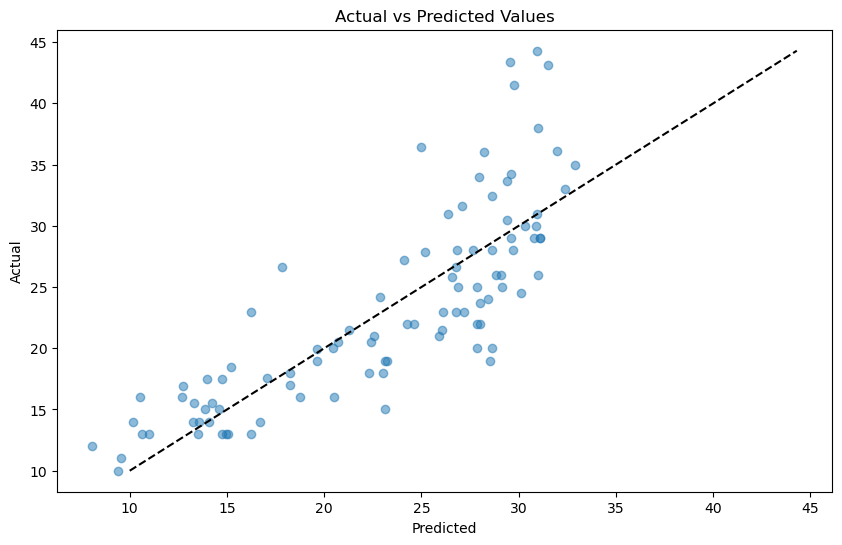

In [49]:
plt.figure(figsize = (10, 6))
           
plt.scatter(y_pred, y_test, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
           
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted Values")
plt.show()

In [50]:
residuals = y_test - y_pred

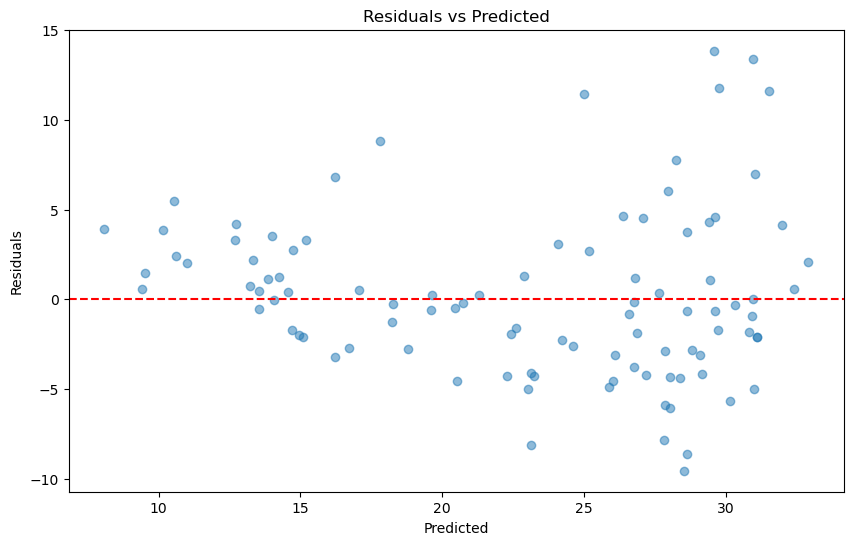

In [53]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, residuals, alpha = 0.5)

plt.axhline(y = 0, color = "r", linestyle = "--")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

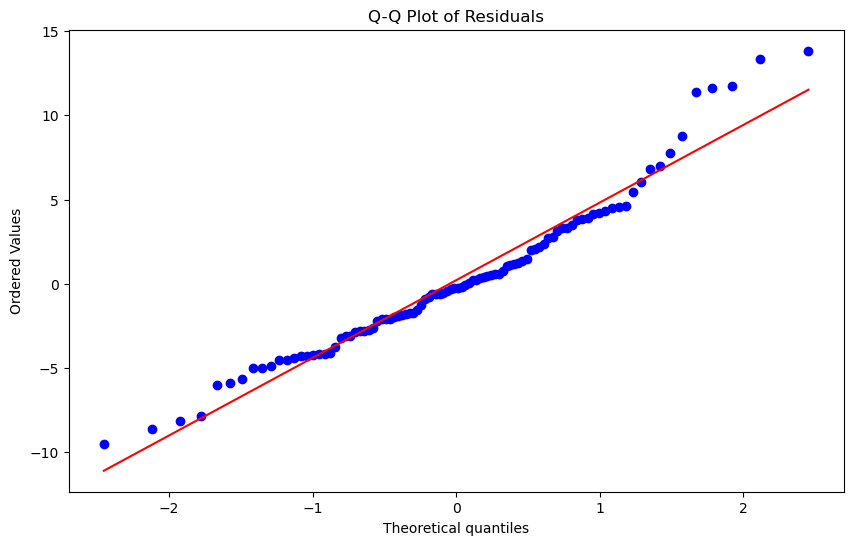

In [57]:
plt.figure(figsize = (10, 6))

stats.probplot(residuals.values.flatten(), dist = "norm", plot = plt)

plt.title("Q-Q Plot of Residuals")
plt.show()